# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

<img src="https://news.store.rambler.ru/img/d52ddd85719025e93d2be214d6b49da6" alt="Drawing" style="width: 600px;"/>

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.0.1">Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.0.2">Описание данных</a></span></li></ul></li></ul></li><li><span><a href="#Реализация-проекта" data-toc-modified-id="Реализация-проекта-2">Реализация проекта</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек.-Загрузка-данных" data-toc-modified-id="Импорт-библиотек.-Загрузка-данных-2.1">Импорт библиотек. Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.2">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.2.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.2.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)-2.2.3">3. data_bulk_time - данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#4.-data_gas---данные-о-продувке-сплава-газом" data-toc-modified-id="4.-data_gas---данные-о-продувке-сплава-газом-2.2.4">4. data_gas - данные о продувке сплава газом</a></span></li><li><span><a href="#5.-data_temp---результаты-измерения-температуры.-Целевая-фича" data-toc-modified-id="5.-data_temp---результаты-измерения-температуры.-Целевая-фича-2.2.5">5. data_temp - результаты измерения температуры. Целевая фича</a></span></li><li><span><a href="#6.-data_wire---данные-о-проволочных-материалах-(объём)" data-toc-modified-id="6.-data_wire---данные-о-проволочных-материалах-(объём)-2.2.6">6. data_wire - данные о проволочных материалах (объём)</a></span></li><li><span><a href="#7.-data_wire_time---данные-о-проволочных-материалах-(время)" data-toc-modified-id="7.-data_wire_time---данные-о-проволочных-материалах-(время)-2.2.7">7. data_wire_time - данные о проволочных материалах (время)</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.2.8">Вывод:</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.3">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-таргета" data-toc-modified-id="Подготовка-таргета-2.3.1">Подготовка таргета</a></span></li><li><span><a href="#Объединение-таблиц.-Работа-с-признаками" data-toc-modified-id="Объединение-таблиц.-Работа-с-признаками-2.3.2">Объединение таблиц. Работа с признаками</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.3.2.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.3.2.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_bulk---данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="3.-data_bulk---данные-о-подаче-сыпучих-материалов-(время)-2.3.2.3">3. data_bulk - данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#4.-data_wire---данные-о-проволочных-материалах-(объём)" data-toc-modified-id="4.-data_wire---данные-о-проволочных-материалах-(объём)-2.3.2.4">4. data_wire - данные о проволочных материалах (объём)</a></span></li><li><span><a href="#5.-data_wire_time---данные-о-проволочных-материалах-(время)" data-toc-modified-id="5.-data_wire_time---данные-о-проволочных-материалах-(время)-2.3.2.5">5. data_wire_time - данные о проволочных материалах (время)</a></span></li><li><span><a href="#Объединение" data-toc-modified-id="Объединение-2.3.2.6">Объединение</a></span></li></ul></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-2.3.3">Обработка выбросов</a></span></li><li><span><a href="#Разбиение-данных-на-train-и-test" data-toc-modified-id="Разбиение-данных-на-train-и-test-2.3.4">Разбиение данных на train и test</a></span></li><li><span><a href="#Грубая-предобработка-train" data-toc-modified-id="Грубая-предобработка-train-2.3.5">Грубая предобработка train</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3.6">Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.4">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Выявление-самых-информативных-фичей" data-toc-modified-id="Выявление-самых-информативных-фичей-2.4.1">Выявление самых информативных фичей</a></span></li><li><span><a href="#Обучение-LinearRegression" data-toc-modified-id="Обучение-LinearRegression-2.4.2">Обучение LinearRegression</a></span></li><li><span><a href="#Обучение-RandomForestRegressor" data-toc-modified-id="Обучение-RandomForestRegressor-2.4.3">Обучение RandomForestRegressor</a></span></li><li><span><a href="#Обучение-CatBoostRegressor" data-toc-modified-id="Обучение-CatBoostRegressor-2.4.4">Обучение CatBoostRegressor</a></span></li><li><span><a href="#Обучение-LightGBM" data-toc-modified-id="Обучение-LightGBM-2.4.5">Обучение LightGBM</a></span></li><li><span><a href="#Обучение-XGBoost" data-toc-modified-id="Обучение-XGBoost-2.4.6">Обучение XGBoost</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5">Выводы</a></span></li></ul></li></ul></div>

# Реализация проекта

## Импорт библиотек. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor

from pyod.models.knn import KNN

import warnings

In [2]:
pd.options.mode.chained_assignment = None  

In [3]:
data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

## Анализ данных

### 1. data_arc - данные об электродах

In [4]:
def analisys(data, describe=True):
    print('Первые 5 строк таблицы:')
    display(data.head())
    print('Информация о таблице:')
    display(data.info())
    if describe == True:
        print('Основные статистики числовых параметров:')
        display(data.describe())
    print('Максимальное количество строк с пропусками:', data.isna().sum().max())
    print()
    print('Количество дубликатов:', data.duplicated().sum())

In [5]:
analisys(data_arc)

Первые 5 строк таблицы:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

Основные статистики числовых параметров:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


Визуализируем параметры мощности. Чтобы график реактивной отобразился корректно, отбросим строку с высоким отрицательным значением.

In [6]:
def hist_plot(data, features, union=False, box_plot=True):
    for feature in features:
        plt.figure(figsize=(15,4))
        plt.hist(data[feature], histtype='bar', bins=30)
        plt.title('Гистограмма параметра ' + feature)
        plt.xlabel(feature)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        #Бокс плот
        if box_plot==True:
            plt.figure(figsize=(15,1))
            plt.boxplot(data[feature], vert=False)
            plt.xlabel(feature)
            plt.title('Диаграмма размаха параметра ' + feature)
            plt.show()


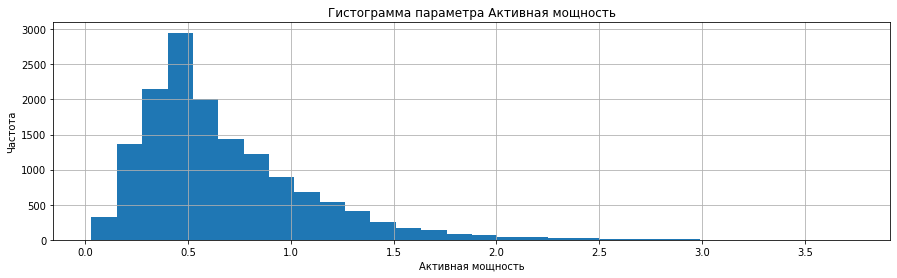

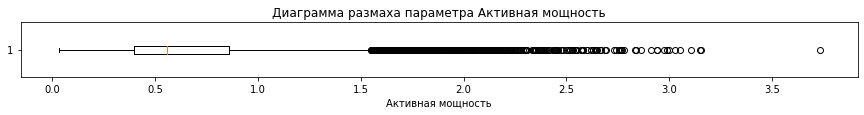

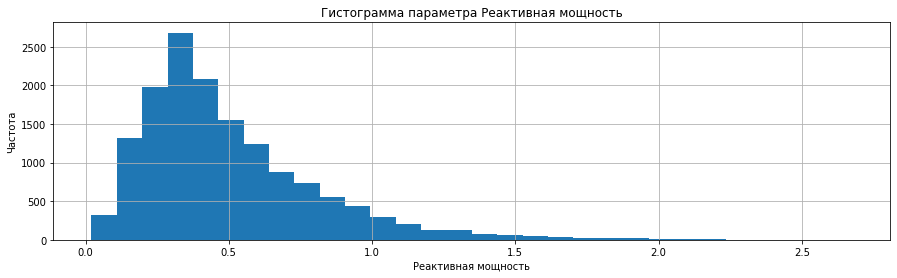

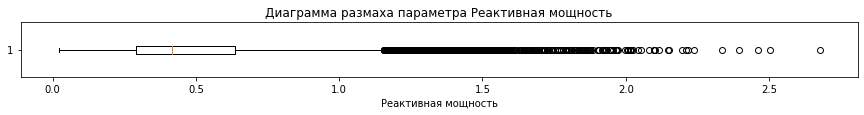

In [7]:
hist_plot(data_arc.loc[data_arc.iloc[:, 4] > 0], data_arc.columns[3:5], union=False)

Распределения похожи на нормальные, с длинным правым хвостом. Диаграммы распределения говорят нам о том, что это выбросы. Причем, их достаточно большое количество.

**План предобработки data_arc:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Обработать столбцы Начало/Конец нагрева дугой. Привести к datetime64
- [x] Столбец Реактивная мощность - содержит высокое отрицательное значение. Обработать его и прочие выбросы.

### 2. data_bulk - данные о подаче сыпучих материалов (объем)

In [8]:
analisys(data_bulk)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Основные статистики числовых параметров:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Большое количество пропусков. Так как это данные об объеме добавленных сыпучих материалов, можно предположить, что пропуски - это отсутствие добавок. Следовательно, можно заполнить Nan на 0 значение.
- [x] Столбец Bulk-8 имеет единственное значение. Странно. Проверить.
- Количество ключей 3129 - в то время как максимальное значение ключа = 3241. Вероятно, есть этапы когда вообще не добавлялось никаких материалов в сплав.
- [x] Отыскать различные типы стали по тому, какие типы сыпучих материалов добавлены в состав. (оказалось слишком много)

### 3. data_bulk_time - данные о подаче сыпучих материалов (время)

In [9]:
analisys(data_bulk_time, describe=False)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk_time:**<br>
Данные соответствуют по количеству значений таблице date_bulk. Возможно, эта таблица избыточна. Но мы составим план ее предобработки на случай, если она все-таки пригодится.
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Данные содержат информацию о дате добавления сыпучих материалов. Привести тип object к типу datetime64
- [x] Данные имеют большое количество пропусков. Обработать

Некоторые материалы (напр. bulk_12, bulk_14, bulk_15) добавляются одновременно (судя по голове таблицы).

### 4. data_gas - данные о продувке сплава газом

In [10]:
analisys(data_gas)

Первые 5 строк таблицы:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Основные статистики числовых параметров:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


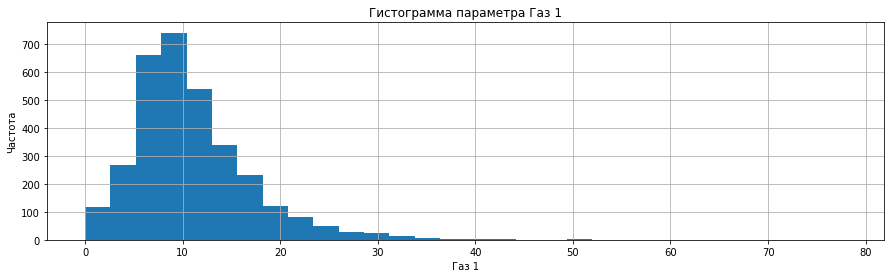

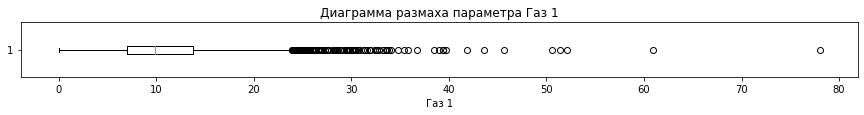

In [11]:
hist_plot(data_gas, [data_gas.columns[1]])

Наблюдаем распределение близкое к нормальному, с длинным правым хвостом в виде выбросов.

**План предобработки data_gas:**
- Количество ключей больше чем в предыдущих таблицах. Min / max значения совпадают. Вероятно, есть партии которые продувались газом, но в чей состав не добавлялось легирующих добавок.
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Обработать выбросы

### 5. data_temp - результаты измерения температуры. Целевая фича

In [12]:
analisys(data_temp)

Первые 5 строк таблицы:


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

Основные статистики числовых параметров:


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Максимальное количество строк с пропусками: 2901

Количество дубликатов: 0


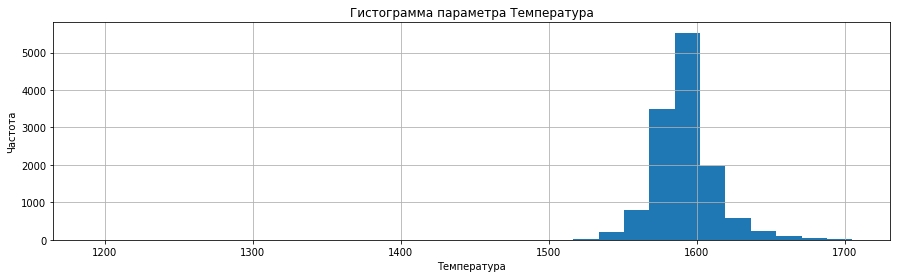

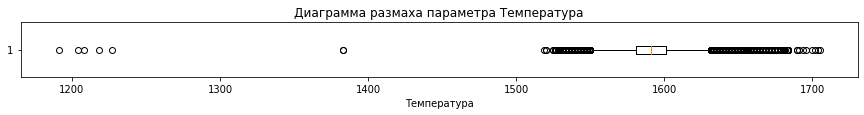

In [13]:
hist_plot(data_temp.dropna(axis=0), [data_temp.columns[2]])

Большая часть данных, визуально, распределена нормально. Однако, в хвостах содержиться большое количество аномалий. 

Согласно [wiki](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BB%D1%8C#:~:text=%D0%A2%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0%20%D0%BF%D0%BB%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%3A%201450%E2%80%941520%20%C2%B0C.%20%D0%A3%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F,%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B8%20%D1%82%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B5%20100%20%C2%B0C%3A),
температура плавления стали: 1450—1520 °C. На производстве ковш всегда подогревается чтобы недопустить остывания стали. 
Поэтому, все что ниже 1450 °C - точно выбросы.

Оценим время между первым и последним замером температуры. Посмотрим на статистики

In [17]:
data_temp['measure_time'] = (pd.to_datetime(data_temp['measure_time']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 


In [18]:
data_temp_grouped = data_temp.groupby('key', as_index=False).agg(first_measure_time = ('measure_time', 'first'),
                                                               last_measure_time = ('measure_time', 'last'))


In [19]:
data_temp_grouped['diff_bw_measures'] = data_temp_grouped['last_measure_time'] -\
                                        data_temp_grouped['first_measure_time']


Посмотрим на статистики:

In [20]:
data_temp_grouped['diff_bw_measures'].describe()

count     3216.000000
mean      1839.861629
std       1246.950298
min          0.000000
25%       1177.000000
50%       1581.000000
75%       2235.000000
max      23537.000000
Name: diff_bw_measures, dtype: float64

**План предобработки data_temp:**
- Min / max значения ключей совпадают с предыдущими таблицами.
- [x] Есть несколько тысяч пропущеных значений температуры. Обработать пропуски.
- [x] Изменить формат столбца "Время замера". Привести к datetime64
- [x] Если последний замер температуры был раньше, чем нагрев ковша - удаляем информацию обо всей партии
- [x] Обработать выбросы

### 6. data_wire - данные о проволочных материалах (объём)

In [14]:
analisys(data_wire)

Первые 5 строк таблицы:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

Основные статистики числовых параметров:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Максимальное количество строк с пропусками: 3080

Количество дубликатов: 0


**План предобработки data_wire:**

- [x] Большое количество пропусков. Таблица несет информацию о проволочных материалах которые добавляют в состав слава. Поэтому отсутствие информации - означает нулевой объем добавок. Следовательно, заполняем пропуски нулями. 
- [ ] Использовать эти данные для определения типа стали.

### 7. data_wire_time - данные о проволочных материалах (время)

In [15]:
analisys(data_wire_time)

Первые 5 строк таблицы:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Основные статистики числовых параметров:


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Максимальное количество строк с пропусками: 3080

Количество дубликатов: 0


**План предобработки data_wire_time:**

Аналогичная data_wire таблица, несущая информацию о времени. Как и data_bulk_time может быть избыточной. Возможно пригодится для определения марки стали. 

- [x] Большое количество пропусков. Обработать

### Вывод:

- Все данные достаточно сырые. 
- Имеется большое количество пропусков. 
- Неудобные для использования названия столбцов. 
- Плюс ко всему, даннные имеют большое количество аномалий. 
- Имеют место нелогичные операции, когда первый процесс начинается позже второго.

В целом, распределения в данных стремятся к нормальному. Избавившись от очевидных выбросов, мы сможем создать достаточно чистые выборки, применимые для ML.

## Предобработка данных

В первую очередь обработаем все данные методами, которые не имеют риска утечки целевого признака.

**Цель** - свести все производственные данные в одну общую таблицу для передачи модели.

Все таблицы имеют проблемы с названиями фичей. Напишем функцию для переименования:

In [16]:
def rename_columns(data, new_names=[], rename=True):
    if rename == False:
        new_names=[]
        for col in data.columns:
            new_names.append(str.lower('_'.join(col.split(' '))))
        data.columns = new_names
    else:
        data.columns = new_names

Теперь подготовим латинские названия для некоторых фреймов. Колонки всех таблиц приведем к нижнему регистру без разделителей:

In [17]:
data_arc_cols = ['key', 'start_heating', 'end_heating', 'active_power', 'reactive_power']
data_gas_cols = ['key', 'gas']
data_temp_cols = ['key', 'measure_time', 'temperature']

In [18]:
rename_columns(data_arc, data_arc_cols, rename=True)
rename_columns(data_bulk, rename=False)
rename_columns(data_bulk_time, rename=False)
rename_columns(data_gas, data_gas_cols, rename=True)
rename_columns(data_temp, data_temp_cols, rename=True)
rename_columns(data_wire, rename=False)
rename_columns(data_wire_time, rename=False)

Посмотрим на результат:

In [19]:
data_arc.columns

Index(['key', 'start_heating', 'end_heating', 'active_power',
       'reactive_power'],
      dtype='object')

Все работает. Начнем предобработку данных об электродах

### Подготовка таргета

Целевой признак спрятан в таблице data_temp. Вытащим его, и обработаем.

В таблицах есть данные партий сплавов, которые не имеют некоторых важных признаков. Финальную температуру таких партий просто невозможно будет предсказать. Заранее почистим данные, оставив только информативные наблюдения. Одно из допущений необходимых для работы модели состоит в том, что производство работает в одном более-менее статичном режиме.

Для работы модели нам необходимо соответсвие таргета следующим условиям:
- Количество измерений температуры партии > 1
- Финальный замер температуры должен быть последним звеном в производственной цепочке
- Использование результатов промежуточных измерений температуры запрещено, т.к. считается ликом в данных
- Данные результаты измерения температуры которых ниже температуры плавления стали - считаются выбросами

Сразу отберем партии по вышеописанным признакам. С ними и продолжим всю дальнейшую работу.

In [20]:
data_temp.head(7)

,key,measure_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0


Найдем те партии, время нагрева ковша которых было позже последнего замера температуры.

Для начала, отберем те строки, значение температуры которых не NaN. Сгруппируем по ключу и найдем последнее время замера:

In [21]:
data_temp['measure_time'] = pd.to_datetime(data_temp['measure_time'])
print('Количество партий до обработки:', data_temp['key'].nunique())

Количество партий до обработки: 3216


In [22]:
last_mesure_data = data_temp.loc[~data_temp['temperature'].isna()].groupby('key', as_index=False).agg(last_measure = ('measure_time', 'last'),
                                                               last_temp = ('temperature', 'last'),
                                                               count_measures = ('temperature', 'count'))
last_mesure_data = last_mesure_data.loc[last_mesure_data['count_measures'] > 1]
display(last_mesure_data.head())
print('Количество пропущеных значений last_temp:', last_mesure_data['last_temp'].isna().sum())
print('Всего значений в таблице:', last_mesure_data.shape[0])

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:39,1613.0,5
1,2,2019-05-03 11:59:12,1602.0,6
2,3,2019-05-03 12:34:57,1599.0,5
3,4,2019-05-03 12:59:25,1625.0,3
4,5,2019-05-03 13:36:01,1602.0,2


Количество пропущеных значений last_temp: 0
Всего значений в таблице: 2475


Отлично, таким образом мы отобрали самые ценные данные. Теперь сравним время замера температуры. Отберем только строки, время замера температуры которых позже, чем время начала / конца нагрева ковша:

In [23]:
data_arc_row = pd.read_csv('final_steel/data_arc.csv')
data_arc_row = data_arc_row.groupby('key', as_index=False).agg(last_start_heating = ('Начало нагрева дугой', 'last'),
                                                               last_end_heating = ('Конец нагрева дугой', 'last'))
data_arc_row['last_start_heating'] = pd.to_datetime(data_arc_row['last_start_heating'])
data_arc_row['last_end_heating'] = pd.to_datetime(data_arc_row['last_end_heating'])

data_arc_row.head()

,key,last_start_heating,last_end_heating
0,1,2019-05-03 11:26:09,2019-05-03 11:28:37
1,2,2019-05-03 11:49:48,2019-05-03 11:53:18
2,3,2019-05-03 12:31:14,2019-05-03 12:32:19
3,4,2019-05-03 12:53:12,2019-05-03 12:57:50
4,5,2019-05-03 13:32:44,2019-05-03 13:33:55


In [24]:
joined_meas_heat = last_mesure_data.merge(data_arc_row, right_on='key', left_on='key')
display(joined_meas_heat.head())
print('Количество уникальных партий до сравнения:', joined_meas_heat['key'].nunique())

,key,last_measure,last_temp,count_measures,last_start_heating,last_end_heating
0,1,2019-05-03 11:30:39,1613.0,5,2019-05-03 11:26:09,2019-05-03 11:28:37
1,2,2019-05-03 11:59:12,1602.0,6,2019-05-03 11:49:48,2019-05-03 11:53:18
2,3,2019-05-03 12:34:57,1599.0,5,2019-05-03 12:31:14,2019-05-03 12:32:19
3,4,2019-05-03 12:59:25,1625.0,3,2019-05-03 12:53:12,2019-05-03 12:57:50
4,5,2019-05-03 13:36:01,1602.0,2,2019-05-03 13:32:44,2019-05-03 13:33:55


Количество уникальных партий до сравнения: 2475


Отберем нужные нам партии соответствующие условию по времени:

In [25]:
good_keys = joined_meas_heat.loc[(joined_meas_heat['last_measure'] > joined_meas_heat['last_start_heating']) |
                     (joined_meas_heat['last_measure'] > joined_meas_heat['last_end_heating'])]['key'].values
good_keys

array([   1,    2,    3, ..., 2497, 2498, 2499])

Отфильтруем найденные партии металла:

In [26]:
final_measure_temp_data = last_mesure_data.loc[last_mesure_data['key'].isin(good_keys)]
display(final_measure_temp_data.head())
print('Количество уникальных партий после сравнения:', final_measure_temp_data['key'].nunique())

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:39,1613.0,5
1,2,2019-05-03 11:59:12,1602.0,6
2,3,2019-05-03 12:34:57,1599.0,5
3,4,2019-05-03 12:59:25,1625.0,3
4,5,2019-05-03 13:36:01,1602.0,2


Количество уникальных партий после сравнения: 2344


Таким образом, наш таргет лишился ~900 уникальных партий. Что примерно равно 27% данных. Много, но сделать с этим ничего нельзя.

Дальше будем работать только с отобранными партиями металла.

Обогатим признаковое пространство. Добавим начальную температуру в качестве признака:

In [27]:
final_measure_temp_data = final_measure_temp_data.join(data_temp.groupby('key', as_index=False).agg(start_temp=('temperature', 'first'))['start_temp'],
                                                      how='left', rsuffix='_r')

final_measure_temp_data = final_measure_temp_data.drop('last_measure', axis=1)

In [28]:
display(final_measure_temp_data.head())
print('Количество уникальных партий стали:', final_measure_temp_data['key'].nunique())

,key,last_temp,count_measures,start_temp
0,1,1613.0,5,1571.0
1,2,1602.0,6,1581.0
2,3,1599.0,5,1596.0
3,4,1625.0,3,1601.0
4,5,1602.0,2,1576.0


Количество уникальных партий стали: 2344


Сохраним хорошие ключи:

In [29]:
good_keys = final_measure_temp_data['key'].unique()

Посмотрим на матрицу корреляции:

In [30]:
final_measure_temp_data.corr()

,key,last_temp,count_measures,start_temp
key,1.000000,-0.078449,-0.057583,-0.011472
last_temp,-0.078449,1.000000,0.054814,0.366398
count_measures,-0.057583,0.054814,1.000000,0.100176
start_temp,-0.011472,0.366398,0.100176,1.000000


Высокой корреляции нет. Призаки оставляем.

### Объединение таблиц. Работа с признаками

Поработаем с признаками. Наша цель - максимально обогатить признаковое пространство, и передать модели. Далее модель уже сама выявит самые информативные фичи.

#### 1. data_arc - данные об электродах

In [31]:
data_arc.head()

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Посмотрим на связь между признаками. 

*(Мы помним, что у reactive_power есть большое отрицательное значение. Отбросим его сейчас)*

In [32]:
data_arc.loc[data_arc['reactive_power'] >= 0].corr()

,key,active_power,reactive_power
key,1.000000,-0.021367,-0.000159
active_power,-0.021367,1.000000,0.963182
reactive_power,-0.000159,0.963182,1.000000


Наблюдаем практически линейную взаимосвязь мощностей. Возможно, чуть более информативной фичей для модели будет отношение активной и реактивной мощностей, так как оно будет содержать в себе контекст обоих признаков. Добавим его:

In [33]:
data_arc['power_ratio'] = data_arc['active_power'] / data_arc['reactive_power']

In [34]:
data_arc.head(3)

,key,start_heating,end_heating,active_power,reactive_power,power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,1.492292


Производственный процесс подразумевает несколько циклов нагрева сплава. Это мы и видим в таблице. Однако, такой формат даты нам неудобен. Машина не сможет понять зависимостей в данных. Лучше, если мы найдем время нагрева в секундах, и сведем в один столбец. Затем сгруппируем данные по ключу, и найдем количество раз нагрева сплава, и другие основные статистики признаков такие как: медиана, среднее, 25 и 75 квантили, максимум и минимум:

Фрейм data_arc в текущем виде нам еще пригодится, поэтому все вычисления проделаем на его копии:

In [35]:
data_arc_modify = data_arc.copy()

Вычисляем время начала нагрева и конца в формате UNIX:

In [36]:
data_arc_modify['start_heating'] = (pd.to_datetime(data_arc_modify['start_heating']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 


In [37]:
data_arc_modify['end_heating'] = (pd.to_datetime(data_arc_modify['end_heating']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 


Находим разницу во времени, то есть, время нагрева сплава:

In [38]:
data_arc_modify['heating_time'] = data_arc_modify['end_heating'] - data_arc_modify['start_heating']


In [39]:
data_arc_modify = data_arc_modify.drop(['start_heating', 'end_heating'], axis=1)

Наконец, группируем данные по номеру партии, и вычисляем описанные выше статистики:

In [109]:
data_arc_grouped = data_arc_modify.groupby('key', as_index=False).agg(heating_time_mean = ('heating_time', 'mean'),
                                                               heating_time_min = ('heating_time', 'min'),
                                                               heating_time_max = ('heating_time', 'max'),
                                                               heating_time_median = ('heating_time', 'median'),
                                                               heating_time_q25 = ('heating_time', lambda x: np.percentile(x, q=25)),
                                                               heating_time_q75 = ('heating_time', lambda x: np.percentile(x, q=75)),
                                                               heating_time_total = ('heating_time', 'sum'),
                                                               num_heatings = ('heating_time', 'count'),
                                                               power_ratio_mean = ('power_ratio', 'mean'),
                                                               power_ratio_min = ('power_ratio', 'min'),
                                                               power_ratio_max = ('power_ratio', 'max'),
                                                               power_ratio_median = ('power_ratio', 'median'),
                                                               power_ratio_q25 = ('power_ratio', lambda x: np.percentile(x, q=25)),
                                                               power_ratio_q75 = ('power_ratio', lambda x: np.percentile(x, q=75)),
                                                               power_ratio_total = ('power_ratio', 'sum'))                   


In [110]:
data_arc_grouped.head(3)

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,power_ratio_min,power_ratio_max,power_ratio_median,power_ratio_q25,power_ratio_q75,power_ratio_total
0,1,219.60,148,365,185.0,172.00,228.0,1098,5,1.538898,1.420582,1.671717,1.548395,1.492292,1.561504,7.694490
1,2,202.75,126,338,173.5,134.25,242.0,811,4,1.551834,1.451893,1.606312,1.574566,1.523741,1.602659,6.207336
2,3,131.00,65,280,109.0,77.00,124.0,655,5,1.583120,1.551444,1.605373,1.581626,1.579819,1.597337,7.915599


#### 2. data_bulk - данные о подаче сыпучих материалов (объем)

Здесь мы иммем объем добавленных сыпучих материалов к каждой партии сплава. Отсутствие информации, соответственно, говорит об отсутствии добавок этого типа. Вероятно, это выжные параметры, которые могут сильно влиять на температуру.

In [111]:
data_bulk.head(3)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0


Заполним пропуски нулями:

In [112]:
data_bulk = data_bulk.fillna(0)
data_bulk.head(3)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0


#### 3. data_bulk - данные о подаче сыпучих материалов (время)

Так же, немаловажные параметры - параметры времени добавления сыпучих материалов. Забегая вперед скажу, что нам удалось выяснить наиболее информативные фичи в этой таблице с помощью ML моделей. Поэтому, необходимость использования всех имеющихся в таблице признаков отпадает. 

Оставляем в таблице только самые важные фичи, и заполняем пропуски нулями.

In [113]:
data_bulk_time_filtered = data_bulk_time.loc[:, ['key',
                                                 'bulk_14',
                                                 'bulk_7',
                                                 'bulk_15',
                                                 'bulk_6',
                                                 'bulk_4',
                                                 'bulk_2',
                                                 'bulk_1']].fillna(0)

In [114]:
data_bulk_time_filtered.head(3)

,key,bulk_14,bulk_7,bulk_15,bulk_6,bulk_4,bulk_2,bulk_1
0,1,2019-05-03 11:03:52,0,2019-05-03 11:03:52,0,2019-05-03 11:21:30,0,0
1,2,2019-05-03 11:40:20,0,2019-05-03 11:40:20,0,2019-05-03 11:46:38,0,0
2,3,2019-05-03 12:09:40,0,2019-05-03 12:09:40,0,2019-05-03 12:31:06,0,0


Объединяем таблицу с таблицей содержащей информацию о нагреве электродами. Так нам удастся найти время добавления в сплав того или иного материала после начала первого цикла нагревания.

In [115]:
data_arc_grouped_bulk = data_arc.groupby('key', as_index=False).agg(start_time = ('start_heating', 'first')).merge(data_bulk_time_filtered)

In [116]:
data_arc_grouped_bulk.head(3)

,key,start_time,bulk_14,bulk_7,bulk_15,bulk_6,bulk_4,bulk_2,bulk_1
0,1,2019-05-03 11:02:14,2019-05-03 11:03:52,0,2019-05-03 11:03:52,0,2019-05-03 11:21:30,0,0
1,2,2019-05-03 11:34:14,2019-05-03 11:40:20,0,2019-05-03 11:40:20,0,2019-05-03 11:46:38,0,0
2,3,2019-05-03 12:06:54,2019-05-03 12:09:40,0,2019-05-03 12:09:40,0,2019-05-03 12:31:06,0,0


Снова преобразовывем колонки с датой в формат удобный для математических операций:

In [117]:
cols_to_change = data_arc_grouped_bulk.columns[2:].to_list()

In [118]:
data_arc_grouped_bulk['start_time'] = (pd.to_datetime(data_arc_grouped_bulk['start_time']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 


In [119]:
for col in cols_to_change:
    data_arc_grouped_bulk[col] = (pd.to_datetime(data_arc_grouped_bulk[col]) - 
                                           pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
    data_arc_grouped_bulk[col] = data_arc_grouped_bulk[col] - data_arc_grouped_bulk['start_time']

In [120]:
data_arc_grouped_bulk.head(3)

,key,start_time,bulk_14,bulk_7,bulk_15,bulk_6,bulk_4,bulk_2,bulk_1
0,1,1556881334,98,-1556881334,98,-1556881334,1156,-1556881334,-1556881334
1,2,1556883254,366,-1556883254,366,-1556883254,744,-1556883254,-1556883254
2,3,1556885214,166,-1556885214,166,-1556885214,1452,-1556885214,-1556885214


Теперь, отрицательные значения приведем к нулю, так как очевидно это те материалы, которые не были добавлены.

In [121]:
def to_zero(x):
    if x < 0:
        x = 0
    return x

In [122]:
data_arc_grouped_bulk = data_arc_grouped_bulk.applymap(to_zero)

In [123]:
for col in data_arc_grouped_bulk.columns:
    if 'bulk' in col:
        data_arc_grouped_bulk.rename(columns={col:col+'_time'}, inplace=True)

In [124]:
data_arc_grouped_bulk.head(3)

,key,start_time,bulk_14_time,bulk_7_time,bulk_15_time,bulk_6_time,bulk_4_time,bulk_2_time,bulk_1_time
0,1,1556881334,98,0,98,0,1156,0,0
1,2,1556883254,366,0,366,0,744,0,0
2,3,1556885214,166,0,166,0,1452,0,0


Отлично, имеем таблицу с информацией о количестве прошедшего времени с момента начала нагревания сплава, до момента добавления того или иного материала.

#### 4. data_wire - данные о проволочных материалах (объём)

Таблица имеет большое количество пропусков. Заполним их нулями:

In [125]:
data_wire = data_wire.fillna(0)
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5. data_wire_time - данные о проволочных материалах (время)

In [126]:
data_arc.head(3)

,key,start_heating,end_heating,active_power,reactive_power,power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,1.492292


In [127]:
data_wire_time = data_wire_time.fillna(0)

Теперь таким же образом как мы поступили с data_bulk_time соединим таблицу с data_arc, и сгруппируем по ключу.

In [128]:
data_arc_grouped_wire = data_arc.groupby('key', as_index=False).agg(start_time = ('start_heating', 'first')).merge(data_wire_time)


In [129]:
data_arc_grouped_wire.head(3)

,key,start_time,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:02:14,2019-05-03 11:11:41,0,0,0,0,0,0,0,0
1,2,2019-05-03 11:34:14,2019-05-03 11:46:10,0,0,0,0,0,0,0,0
2,3,2019-05-03 12:06:54,2019-05-03 12:13:47,0,0,0,0,0,0,0,0


Найдем количество времени прошедшее с момента начала первого нагревания сплава, до момента добавления проволочных материалов:

In [130]:
cols_to_change = data_arc_grouped_wire.columns[2:].to_list()

In [131]:
data_arc_grouped_wire['start_time'] = (pd.to_datetime(data_arc_grouped_wire['start_time']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 


In [132]:
for col in cols_to_change:
    data_arc_grouped_wire[col] = (pd.to_datetime(data_arc_grouped_wire[col]) - 
                                           pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
    data_arc_grouped_wire[col] = data_arc_grouped_wire[col] - data_arc_grouped_wire['start_time']

Приравняем отрицательные значения к нулю:

In [133]:
data_arc_grouped_wire = data_arc_grouped_wire.applymap(to_zero)

In [134]:
for col in data_arc_grouped_bulk.columns:
    if 'wire' in col:
        data_arc_grouped_bulk.rename(columns={col:col+'_time'}, inplace=True)

In [135]:
data_arc_grouped_wire.head(3)

,key,start_time,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,1556881334,567,0,0,0,0,0,0,0,0
1,2,1556883254,716,0,0,0,0,0,0,0,0
2,3,1556885214,413,0,0,0,0,0,0,0,0


Отбросим столбец начала нагревания сплава за ненадобностью.

In [136]:
data_arc_grouped_wire = data_arc_grouped_wire.drop('start_time', axis=1)

In [137]:
print('Максимальное количество пропущеных значений:', data_arc_grouped_wire.isna().sum().max())

Максимальное количество пропущеных значений: 0


Переименуем полученные столбцы, чтобы при дальшейшем объединении таблиц не возникло путаницы:

In [138]:
for col in data_arc_grouped_wire.columns:
    if 'wire' in col:
        data_arc_grouped_wire.rename(columns={col:col+'_time'}, inplace=True)

#### Объединение

Сведем все признаки в итоговый фрейм. Отфильтруем партии с помощью good_keys, разобьем данные на train и test, и на train завершим предобработку.

In [139]:
all_datas = [data_arc_grouped, data_bulk, data_arc_grouped_bulk, data_gas, final_measure_temp_data, data_wire, data_arc_grouped_wire]
general_table = pd.DataFrame(data=data_arc_grouped['key'], columns=['key'])
counter = 1
for data in all_datas:
    general_table = general_table.merge(data, on='key', how='outer')
    counter += 1

In [140]:
display(general_table.head())
print('Размер таблицы:', general_table.shape)

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,wire_9,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,0.0,567.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,0.0,716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,0.0,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,0.0,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,0.0,422.0,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Размер таблицы: (3241, 61)


Итоговая таблица есть. Отфильтруем только имеющиеся в таргете партии металла:

In [141]:
general_table = general_table.loc[general_table['key'].isin(good_keys)]

In [142]:
display(general_table.head())
print('Размер таблицы:', general_table.shape)
print('Максимальное количество пропусков:', general_table.isna().sum().max())

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,wire_9,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,0.0,567.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,0.0,716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,0.0,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,0.0,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,0.0,422.0,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Размер таблицы: (2344, 61)
Максимальное количество пропусков: 94


Лишились ~900 объектов. В любом случае, для них не было таргета и участвовать в обучении объекты не могли.

Так же, имеем около сотни пропусков. Пока удалять их не будем, а заполним нулями:

In [143]:
general_table = general_table.fillna(0)
print('Максимальное количество пропусков:', general_table.isna().sum().max())

Максимальное количество пропусков: 0


### Обработка выбросов

Удалять выбросы не будем. Наш датасет и так не очень большой чтобы жертвовать информацией, которую могут содержать выбросы. Добавим новую фичу "is_outlier". Она будет содержать число признаков, по которым объект является выбросом:

In [144]:
x = general_table.drop('last_temp', axis=1)
y = general_table['last_temp']

In [145]:
def is_outlier(x):
    outliers_counter = pd.Series(data=0, index=x.index)
    for col in x.columns[1:]:
        IQR = stats.iqr(x[col], interpolation = 'midpoint')
        low_thresh = np.percentile(x[col], 25, interpolation = 'midpoint') - 1.5 * IQR
        high_thresh = np.percentile(x[col], 75, interpolation = 'midpoint') + 1.5 * IQR

        mask = np.where(((x[col] > high_thresh) | (x[col] < low_thresh)), 1, 0)
        outliers_counter += mask
    
    return outliers_counter

In [146]:
x['is_outlier'] = is_outlier(x)

In [147]:
x.head()

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time,is_outlier
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,567.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,422.0,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Разбиение данных на train и test 

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [149]:
display(x_train.shape)
display(y_train.shape)

(1758, 61)

(1758,)

### Грубая предобработка train

Нормируем данные. Прогоним фреймы через StandardScaler:

In [150]:
def normalize(x_train, x_test):
    # запоминаем названия колонок с количественным признаком                                
    col_names = [x for x in x_train.columns]
    
    # обучаем модель нормирования на тренировочной выборке                                                                            
    scaler = StandardScaler()
    scaler.fit(x_train[col_names])
    
    # выключаем длинное предупреждение о копировании                                                                            
    pd.options.mode.chained_assignment = None

    # преобразовываем количественные признаки                                                                            
    x_train[col_names] = scaler.transform(x_train[col_names])
    x_test[col_names] = scaler.transform(x_test[col_names])
    #x_test_final[col_names] = scaler.transform(x_test_final[col_names])

                                                                                
    return x_train, x_test  #, x_test_final

In [151]:
x_train, x_test = normalize(x_train.iloc[:, 1:], x_test.iloc[:, 1:])

### Вывод:

В результате предобработки мы потеряли около 30% партий металла. Однако, обогатили признаковое пространство, раздув итоговый датасет до 61 фичи. Разбили данные на тренировочную и тестовую выборку. Провели нормализацию.

## Обучение моделей

### Выявление самых информативных фичей

Optimal number of features : 14


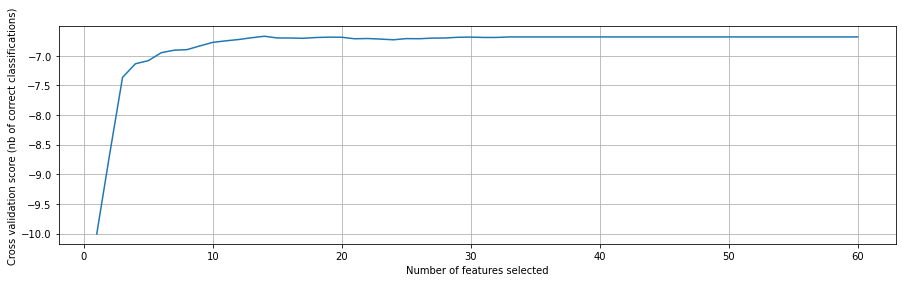

In [152]:
lgbm = LGBMRegressor(n_estimators=50,
                     learning_rate=0.1,
                     max_depth=3,
                     random_state=42)

min_features_to_select = 1  
rfecv = RFECV(estimator=lgbm, step=1, cv=3, scoring='neg_mean_absolute_error')
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.grid(True)
plt.show()


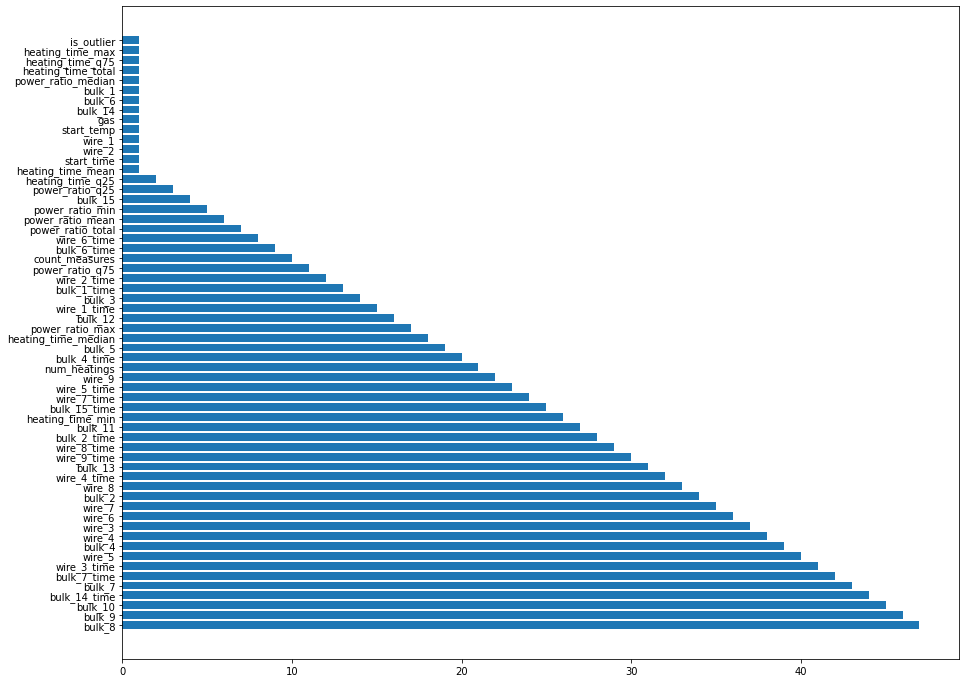

In [153]:
feat_importance = pd.DataFrame(data={'importance':rfecv.ranking_,
                                     'column':x_train.columns}).sort_values('importance', ascending=False)

plt.figure(figsize=(15, 12))
plt.barh(feat_importance['column'], feat_importance['importance'])
plt.show()

Отфильтруем выборки, оставив только самые информативные фичи:

In [154]:
x_train_tr = x_train.loc[:, feat_importance.loc[feat_importance['importance'] == 1]['column'].to_list()]
x_test_tr = x_test.loc[:, feat_importance.loc[feat_importance['importance'] == 1]['column'].to_list()]
#x_test_final_tr = x_test_final.loc[:, feat_importance.loc[feat_importance['importance'] == 1]['column'].to_list()]

Посмотрим на корреляцию м/у признаками:

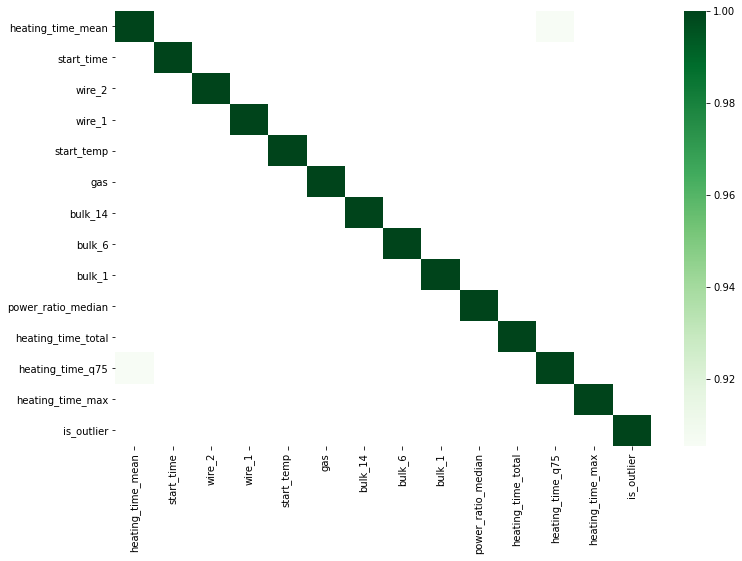

In [155]:
corr = x_train_tr.corr()

kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens");

Есть несколько признаков с высокой корреляцией. В целом, зависимость не совсем линейная, поэтому признаки оставляем.

В итоговой тестовой выборке осталось всего 28 признаков. При этом, подавляющая их часть сформированы нами. На них и продолжим обучаться.

### Обучение LinearRegression

In [156]:
lr = LinearRegression()
lr.fit(x_train_tr, y_train)

LinearRegression()

In [157]:
prediction_lr = lr.predict(x_test_tr)

In [158]:
def extansive_score(y_test, y_pred, num_obj_to_plot, model_name='model'):
    
    plt.figure(figsize=(15,5))
    plt.plot(y_test.reset_index(drop=True)[:num_obj_to_plot], label='Тестовые данные')
    plt.plot(pd.Series(y_pred)[:num_obj_to_plot], label='Предсказания модели')
    plt.title('График предсказаний модели ' + model_name)
    plt.xlabel('Номер партии / объекта')
    plt.ylabel('Температура, °C')
    plt.legend()
    plt.grid(True)
    
    print('{} score: {:.3f}'.format(model_name, mean_absolute_error(y_test, y_pred)))

LinearRegression score: 7.653


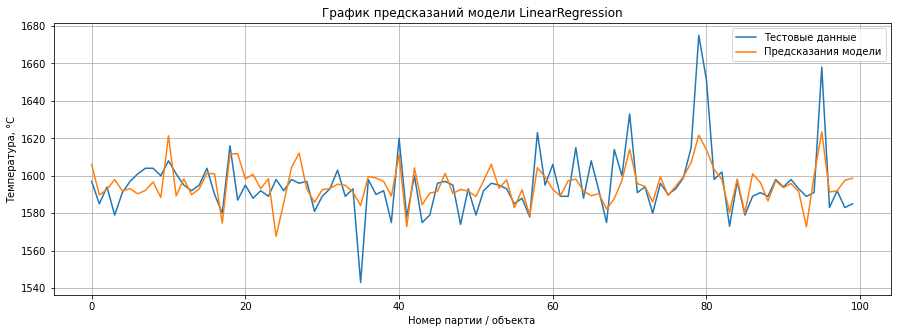

In [159]:
extansive_score(y_test, prediction_lr, 100, model_name='LinearRegression')

### Обучение RandomForestRegressor

In [160]:
params_rf = {'n_estimators':[50, 100, 150],
             'criterion':['mae'],
             'max_depth':[3,4,5],
             'random_state':[42]}
rf = RandomForestRegressor()

In [161]:
searcher = RandomizedSearchCV(rf, params_rf, random_state=42)

In [162]:
%%time
searcher.fit(x_train_tr, y_train)

/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 6min 57s, sys: 1.51 s, total: 6min 59s
Wall time: 7min 3s


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mae'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'random_state': [42]},
                   random_state=42)

In [163]:
prediction_rf = searcher.best_estimator_.predict(x_test_tr)

RandomForestRegressor score: 6.768


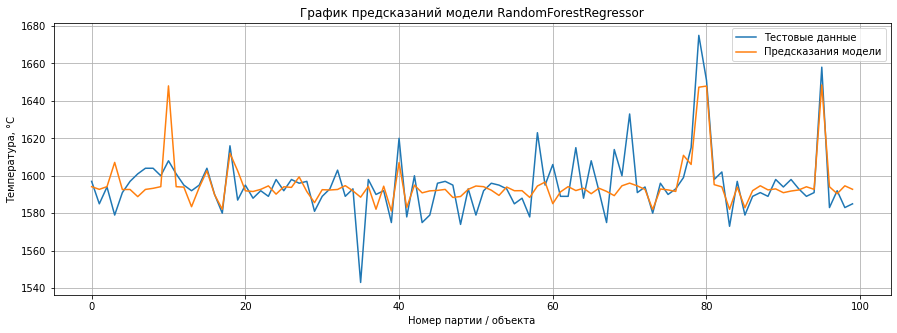

In [164]:
extansive_score(y_test, prediction_rf, 100, model_name='RandomForestRegressor')

### Обучение CatBoostRegressor

In [165]:
params_cb = {'n_estimators':[50, 100, 150],
             'loss_function':['MAE'],
             'max_depth':[3,4,5],
             'random_state':[42],
             'verbose':[False]}
cb = CatBoostRegressor()

In [166]:
searcher_cb = GridSearchCV(cb, params_cb, cv=5)

In [167]:
%%time
searcher_cb.fit(x_train_tr, y_train)
best_est_cb = searcher_cb.best_estimator_
prediction_cb = best_est_cb.predict(x_test_tr)

CPU times: user 16.2 s, sys: 2.28 s, total: 18.5 s
Wall time: 9 s


CatBoostRegressor score: 6.211


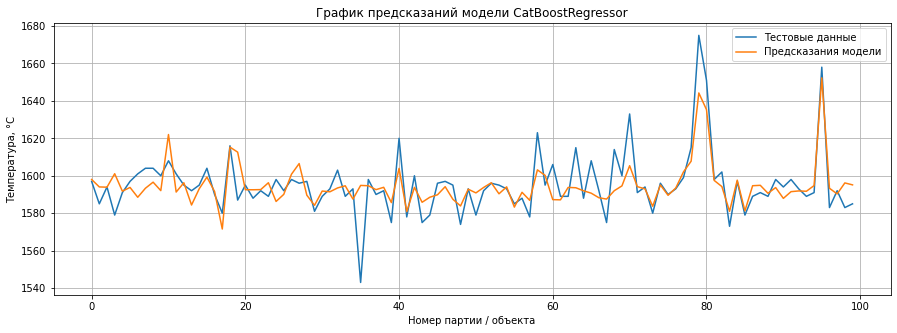

In [168]:
extansive_score(y_test, prediction_cb, 100, model_name='CatBoostRegressor')

### Обучение LightGBM

In [169]:
params_lgbm = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3, 4, 5],
               'num_leaves':range(5,10),
               'random_state':[42]}
lgbm = LGBMRegressor()

In [170]:
searcher_lgbm = GridSearchCV(lgbm, params_lgbm, cv=5)

In [171]:
%%time
searcher_lgbm.fit(x_train_tr, y_train)
best_est_lgbm = searcher_lgbm.best_estimator_
prediction_lgbm = best_est_lgbm.predict(x_test_tr)

CPU times: user 1min 33s, sys: 32.7 s, total: 2min 6s
Wall time: 43.6 s


LGBMRegressor score: 6.238


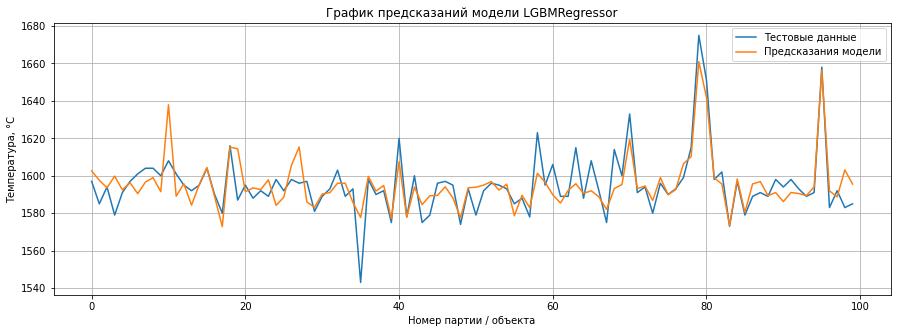

In [172]:
extansive_score(y_test, prediction_lgbm, 100, model_name='LGBMRegressor')

### Обучение XGBoost

In [173]:
params_xgb = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3,4,5],
               'random_state':[42]}
xgb = XGBRegressor()

In [174]:
searcher_xgb = GridSearchCV(xgb, params_xgb, cv=5)

In [175]:
%%time
searcher_xgb.fit(x_train_tr, y_train)
best_est_xgb = searcher_xgb.best_estimator_
prediction_xgb = best_est_xgb.predict(x_test_tr)

CPU times: user 45.2 s, sys: 5.33 s, total: 50.6 s
Wall time: 15.1 s


XGBoost score: 6.152


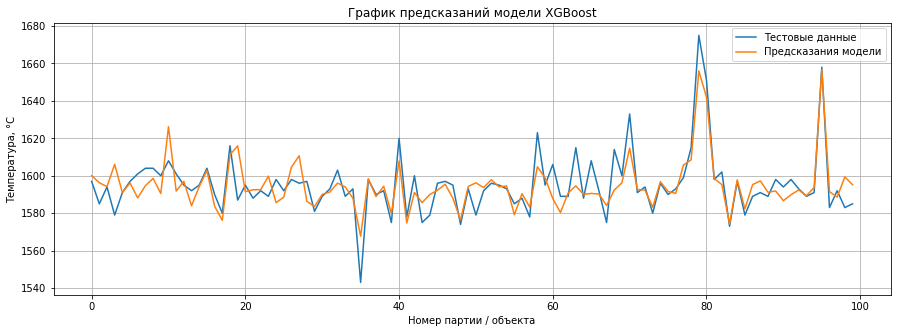

In [176]:
extansive_score(y_test, prediction_xgb, 100, model_name='XGBoost')

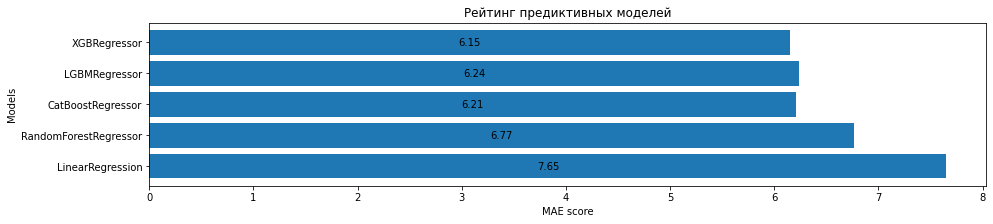

In [177]:
predictions = [prediction_lr, prediction_rf, prediction_cb, prediction_lgbm, prediction_xgb]
models = ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor', 'XGBRegressor']
scores = []


for pred in predictions:
    scores.append(mean_absolute_error(y_test, pred))
score_data = pd.DataFrame(data={'model':models, 'score':scores})

fig, ax = plt.subplots(figsize=(15, 3))
hbars = ax.barh(score_data['model'], score_data['score'], align='center')
ax.set_ylabel('Models')
ax.set_xlabel('MAE score')
ax.set_title('Рейтинг предиктивных моделей')

ax.bar_label(hbars, fmt='%.2f', label_type='center')

plt.show()

Самой результативной оказалась модель XGBRegressor.

## Выводы

Целью исследования являлась оптимизация производственных расходов. Перед нами стояла задача определения финального значения температуры сплава в плавильном ковше. В качестве входных данных имелись объемные таблицы с информацией о времени, количестве добавок, температуре и др. 

В процессе предобработки выяснилось, что данные являются достаточно "сырыми", т.е. имеют большое количество пропусков, несостыковок по времени. Так же, имелись партии металла, которые в процессе производства не прошли необходимое количество стадий. Возможно, имел место технический сбой. Несмотря на вышесказанное, нам удалось выделить выборку в > 2000 объектов. Из исходных данных мы сформировали признаковое пространство в 61 фичу. 

Обучили 5 моделей. От простой линейной регрессии до бустингов. Самой результативной оказалась XGBRegressor, которая пробила необходимый порог ошибки в 6 °C. 

**Рекомендции:** Можно еще очень долго улучшать модель. Как один из вариантов - воспользоваться алгоритмом автоматической генерации признаков, на основе имеющихся. Уверен, что в данных еще осталась большая доля информации, которая поможет сильно уменьшить ошибку предсказания. Плюс ко всему, можно подобрать лучшие параметры и для самого бустинга. Однако, оба этих метода очень затратны с точки зрения необходимого времени и вычислительной сложности.